In [1]:
%config Completer.use_jedi = False

In [43]:
# import some data analysis tools

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# import sklearn ML algorithms
from sklearn. preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# evaluation metric
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# turn off warnings
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.preprocessing import LabelEncoder

In [3]:
scaler = MinMaxScaler()

In [4]:
# load train and test data

train = pd.read_csv('train_oSwQCTC.zip', compression='zip')
test = pd.read_csv('test_HujdGe7.zip', compression='zip')



### data exploration

Variable	Definition
---
- User_ID	User ID
- Product_ID	Product ID
- Gender	Sex of User
- Age in bins
- Occupation	Occupation (Masked)
- City_Category	Category of the City (A,B,C)
- Stay_In_Current_City_Years	Number of years stay in current city
- Marital_Status	Marital Status
- Product_Category_1	Product Category (Masked)
- Product_Category_2	Product may belongs to other category also (Masked)
- Product_Category_3	Product may belongs to other category also (Masked)
- Purchase	Purchase Amount (Target Variable)

Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

https://datahack.analyticsvidhya.com/contest/black-friday/



In [5]:
# training data

df = train.describe().T
df['missing values'] = 1 - df['count']/len(train)
round(df,2)

,count,mean,std,min,25%,50%,75%,max,missing values
User_ID,550068.0,1003028.84,1727.59,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0,0.00
Occupation,550068.0,8.08,6.52,0.0,2.0,7.0,14.0,20.0,0.00
Marital_Status,550068.0,0.41,0.49,0.0,0.0,0.0,1.0,1.0,0.00
Product_Category_1,550068.0,5.40,3.94,1.0,1.0,5.0,8.0,20.0,0.00
Product_Category_2,376430.0,9.84,5.09,2.0,5.0,9.0,15.0,18.0,0.32
Product_Category_3,166821.0,12.67,4.13,3.0,9.0,14.0,16.0,18.0,0.70
Purchase,550068.0,9263.97,5023.07,12.0,5823.0,8047.0,12054.0,23961.0,0.00


- Product_Category_3 has 70% missing values
- Product_Category_2 has 32% missingness


In [6]:
# test data

df = test.describe().T
df['missing values'] = 1 - df['count']/len(test)
round(df,2)

,count,mean,std,min,25%,50%,75%,max,missing values
User_ID,233599.0,1003029.36,1726.50,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0,0.00
Occupation,233599.0,8.09,6.52,0.0,2.0,7.0,14.0,20.0,0.00
Marital_Status,233599.0,0.41,0.49,0.0,0.0,0.0,1.0,1.0,0.00
Product_Category_1,233599.0,5.28,3.74,1.0,1.0,5.0,8.0,18.0,0.00
Product_Category_2,161255.0,9.85,5.09,2.0,5.0,9.0,15.0,18.0,0.31
Product_Category_3,71037.0,12.67,4.13,3.0,9.0,14.0,16.0,18.0,0.70


- Product_Category_3 has 70% missingness
- Product_Category_2 has 31% missingness

In [7]:
sample_submission = pd.read_csv('Sample_Submission_Tm9Lura.csv')
sample_submission

,User_ID,Product_ID,Purchase


In [8]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
# replacing missing values for product category 2
train.Product_Category_2.fillna(value=train.Product_Category_2.mean(), inplace=True)
test.Product_Category_2.fillna(value=test.Product_Category_2.mean(), inplace=True)


In [10]:
train.drop(columns='Product_Category_3', inplace=True, axis=1)
test.drop(columns='Product_Category_3', inplace=True, axis=1)

In [11]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB
None


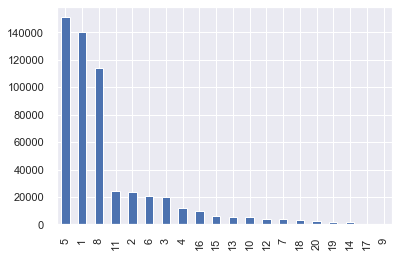

In [12]:
train.Product_Category_1.value_counts().plot('bar')

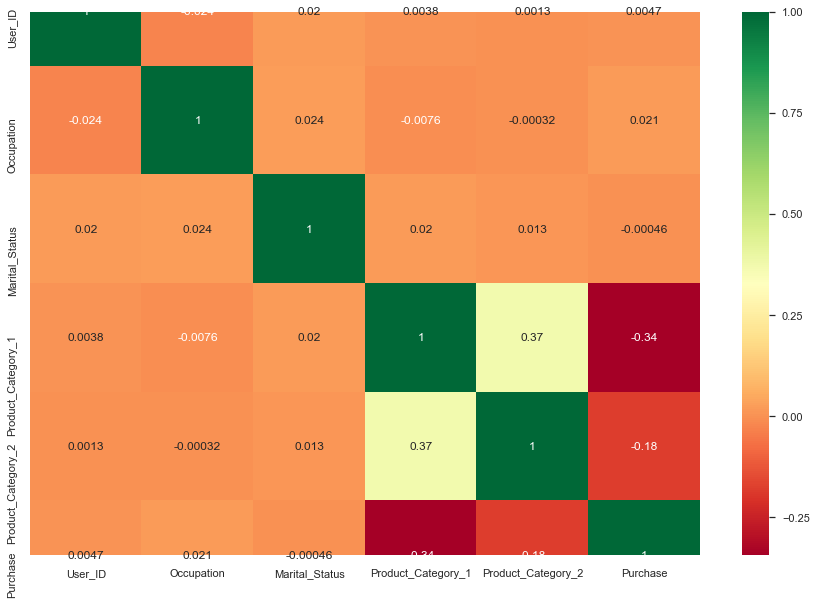

In [73]:
plt.figure(figsize=(15,10))

sns.heatmap(data=train.corr() , cmap='RdYlGn', annot=True)

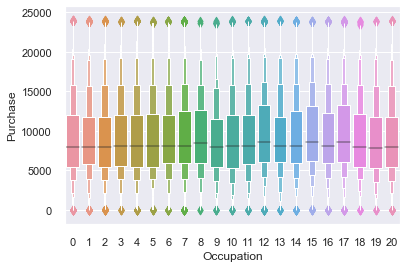

In [39]:
sns.boxenplot(data=train,x='Occupation', y='Purchase')

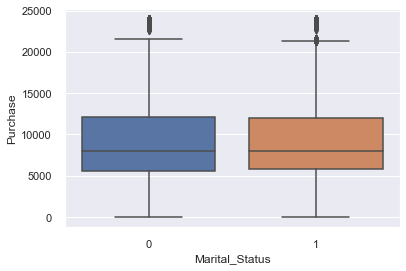

In [75]:
sns.boxplot(data=train, x='Marital_Status', y='Purchase')

In [76]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

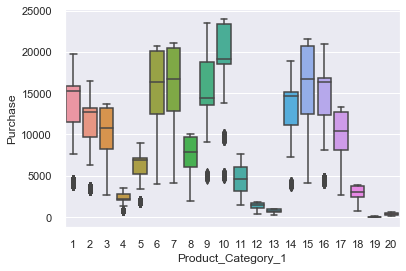

In [77]:
sns.boxplot(data=train, x='Product_Category_1', y='Purchase')

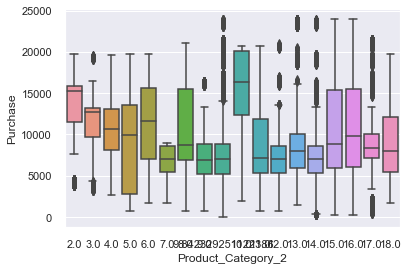

In [78]:
sns.boxplot(data=train, x='Product_Category_2', y='Purchase')

- Product_Category_1 and Product_Category_2 are strong contributors to purchase or target variable

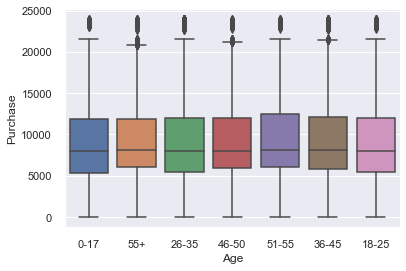

In [79]:
sns.boxplot(data=train, x='Age', y='Purchase')

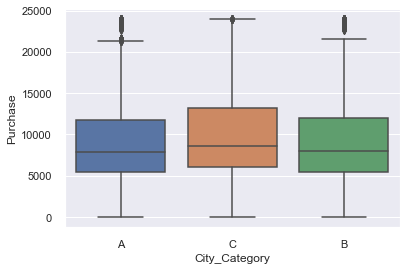

In [42]:
sns.boxplot(data=train, x='City_Category', y='Purchase')

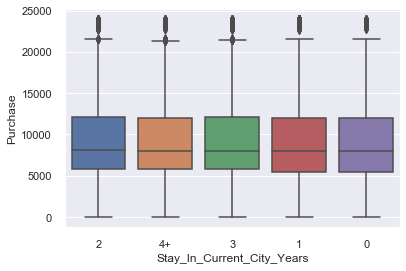

In [81]:

sns.boxplot(data=train, x='Stay_In_Current_City_Years', y='Purchase')

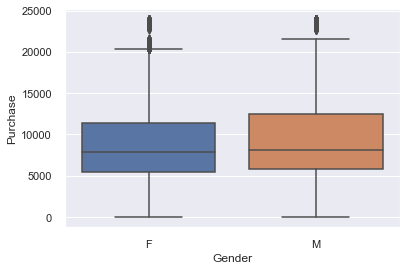

In [82]:
sns.boxplot(data=train, x='Gender', y='Purchase')

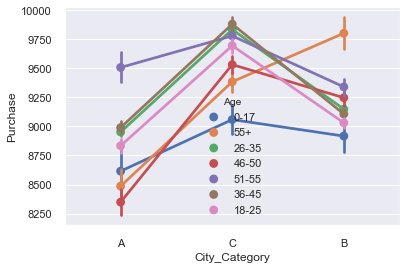

In [40]:
sns.pointplot(data=train, x='City_Category', y='Purchase', hue='Age')

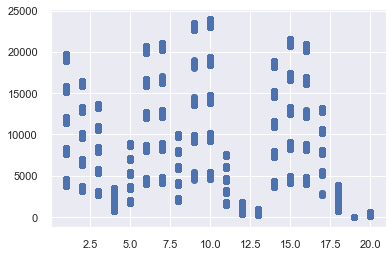

In [14]:
plt.scatter(train.Product_Category_1, train.Purchase)

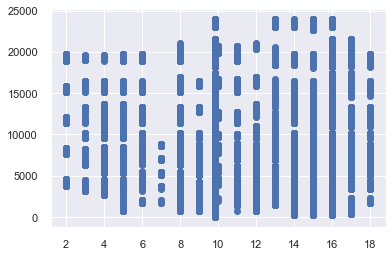

In [15]:
plt.scatter(x=train.Product_Category_2, y=train.Purchase)

In [12]:
# prepare X and y

X = train[['Product_Category_1','Product_Category_2', 'Occupation']]
y = train.Purchase

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [33]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)


In [34]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
X_test_transformed = poly.transform(X_test)
y_pred = lin_reg.predict(X_test_transformed)

In [36]:
mean_squared_error(y_test, y_pred)

15984259.742451064

In [37]:
poly_degree = [2,4,6,10]
errors=[]
 
for degree in poly_degree:
    lin_reg = LinearRegression()
    poly = PolynomialFeatures(degree)
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_poly = poly.fit_transform(X_train_scaled)
    lin_reg.fit(X_train_poly, y_train)
    X_test_scaled = scaler.transform(X_test)
    X_test_transformed = poly.transform(X_test_scaled)
    y_pred = lin_reg.predict(X_test_transformed)
    errors.append(mean_squared_error(y_test, y_pred))

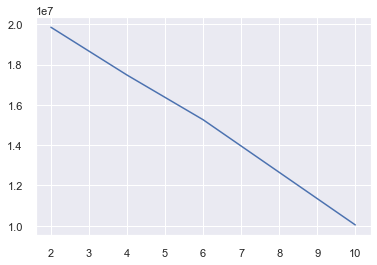

In [38]:
plt.plot(poly_degree, errors)

In [19]:
lin_reg = LinearRegression()
poly = PolynomialFeatures(degree=16)
X_train_scaled = scaler.fit_transform(X_train)
X_train_poly = poly.fit_transform(X_train_scaled)
lin_reg.fit(X_train_poly, y_train)
X_test_scaled = scaler.transform(X_test)
X_test_transformed = poly.transform(X_test_scaled)
y_pred = lin_reg.predict(X_test_transformed)
mean_squared_error(y_test, y_pred)

8960103.049003145

In [42]:
bg_reg = BaggingRegressor(base_estimator=LinearRegression())

poly = PolynomialFeatures(degree=12)
X_train_poly = poly.fit_transform(X_train)
bg_reg.fit(X_train_poly, y_train)


BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred = bg_reg.predict(X_test_transformed)

mean_squared_error(y_test ,y_pred)

10191950.51393102

In [90]:
poly = PolynomialFeatures(degree=12)
X_train_poly = poly.fit_transform(X)
bg_reg.fit(X, y)


BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [14]:
forest = RandomForestRegressor(n_estimators=10)


# poly = PolynomialFeatures(degree=12)
# X_train_poly = poly.fit_transform(X_train)




In [15]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [17]:
y_pred = forest.predict(X_test)
mean_squared_error(y_test, y_pred)


8904673.257917615

In [124]:
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [125]:
test_X = test[['Product_Category_1','Product_Category_2']]

In [126]:
y_pred = forest.predict(test_X)

In [127]:
sample_submission

,User_ID,Product_ID,Purchase


In [128]:
y_pred

array([13593.73531863, 11003.35681403,  6286.2101199 , ...,
       12882.86549652, 19715.94731792,  2237.73468941])

In [129]:
submission = test[['User_ID', 'Product_ID']]

In [130]:
submission['Purchase'] = y_pred

In [131]:
submission.to_csv('submission.csv', index=False)

- leader board top scorer : 2300
- my score : 3000